In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from summarytools import dfSummary 
import holidays
import seaborn as sns
import matplotlib.pyplot as plt

Combining all datasets

In [ ]:
data_2023 = pd.read_csv(r'.\OneDrive_2025-10-14\Data hackathon 2025 Fall_PTC data\open_data_trips_2018-2025\open_data_trips_2023.csv')
data_2024 = pd.read_csv(r'.\OneDrive_2025-10-14\Data hackathon 2025 Fall_PTC data\open_data_trips_2018-2025\open_data_trips_2024.csv')
data_2025 = pd.read_csv(r'.\OneDrive_2025-10-14\Data hackathon 2025 Fall_PTC data\open_data_trips_2018-2025\open_data_trips_2025.csv')


In [53]:
weather_data = pd.read_csv(r'.\\data_raw\weather_2023jan_to_Oct2025.csv')
weather_data

,hour,day,month,year,hour.1,precip_amount_mm
0,0,1,1,2023,0,0.0
1,1,1,1,2023,1,0.0
2,2,1,1,2023,2,0.0
3,3,1,1,2023,3,0.0
4,4,1,1,2023,4,0.0
...,...,...,...,...,...,...
21576,19,14,10,2025,19,0.0
21577,20,14,10,2025,20,0.0
21578,21,14,10,2025,21,0.0
21579,22,14,10,2025,22,0.0


In [41]:
# Combine them
data_combined = pd.concat([data_2023, data_2024, data_2025], axis=0).reset_index()
data_combined

,index,ds,pickup_hr,pickup_municipality,pickup_community_council,pickup_ward,dropoff_municipality,dropoff_community_council,dropoff_ward,trip_ct,avg_fare,avg_trip_distance,avg_waittime
0,0,2023-01-01,2023-01-01 08:00:00-05,Toronto,North York,Not included elsewhere,Whitby,Not in Toronto,Not in Toronto,1,56.69,46.30,5.00
1,1,2023-01-01,2023-01-01 08:00:00-05,Toronto,Scarborough,Not included elsewhere,Oshawa,Not in Toronto,Not in Toronto,2,50.15,43.30,6.50
2,2,2023-01-01,2023-01-01 09:00:00-05,Vaughan,Not in Toronto,Not in Toronto,Toronto,Scarborough,Not included elsewhere,1,26.31,15.90,8.00
3,3,2023-01-01,2023-01-01 02:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,402,45.36,5.85,8.17
4,4,2023-01-01,2023-01-01 03:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,462,36.14,6.17,8.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868187,2121528,2025-03-20,2025-03-20 09:00:00-04,Pickering,Not in Toronto,Not in Toronto,Toronto,Scarborough,25 - Scarborough-Rouge Park,13,16.23,9.62,2.77
7868188,2121529,2025-03-20,2025-03-20 11:00:00-04,Pickering,Not in Toronto,Not in Toronto,Toronto,Scarborough,25 - Scarborough-Rouge Park,11,14.47,8.75,3.27
7868189,2121530,2025-03-20,2025-03-20 13:00:00-04,Markham,Not in Toronto,Not in Toronto,Toronto,Scarborough,25 - Scarborough-Rouge Park,10,24.82,16.12,2.50
7868190,2121531,2025-03-20,2025-03-20 13:00:00-04,Pickering,Not in Toronto,Not in Toronto,Toronto,Scarborough,25 - Scarborough-Rouge Park,11,14.23,8.75,2.82


In [5]:
dfSummary(data_combined)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,index[int64],Mean (sd) : 1337720.0 (799288.7)min < med < max:0.0 < 1311365.0 < 3011054.0IQR (CV) : 1311365.2 (1.7),"3,011,055 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSUlEQVR4nO3bsW7aUBSH8XMhIBOoLUQKm5fuHTyy9A36sF27wwswdMnEgpCQMcINArnukqVLwL6Q+E+/35xz7x0+IVnKcWVZGtB0rY9+AHCJh3N/4JzrmVm35vktM/tTc9Z3XvVu33cfy7J88ZhvpDdDdc71RqPR9zAMh1UPLoqik+f5l8Fg8NxqtU7vOa96t++7zcx2u13qnPtxb7Ge+0XthmE4nE6nL1EUHaocvFwuh4vF4nOSJL8mk0la9WE+86p3+747y7JgNpsNN5tN18z+q1DNzCyKosN4PP5d5eA0TXtmZv1+v/Ks77zq3b7vftWrOddofExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwkWrKNBRFEXHzELnXJ3xxm6wEuodyfO8czqdvsZx3G6325WWMc3Mttvt3jn308wqz766WeiEekeOx+NDEASPSZIcqm6xrlarT/P5/Fscx091Ije77ao2od6huhuwdSM3u/2qNqHiH01d1earHxIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRL4x2lczS0XCwkVV+G7WHhu34pQcRU+i4WX7FsRKq7KY+fqzX0rPqYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAh4aLlvizLgqoH7/f7wMwsz/NgvV4/vue86t2q7/adv6SvvxugYu+ytqS8AAAAAElFTkSuQmCC"">",0(0.0%)
2,ds[object],1. 2025-07-122. 2025-07-263. 2025-06-074. 2025-06-215. 2024-12-146. 2025-06-147. 2025-05-248. 2025-08-029. 2025-07-1910. 2025-04-2611. other,"10,168 (0.1%)10,158 (0.1%)10,110 (0.1%)10,082 (0.1%)9,977 (0.1%)9,938 (0.1%)9,934 (0.1%)9,924 (0.1%)9,911 (0.1%)9,887 (0.1%)7,768,103 (98.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyy8zcz8zt3g/hqn1s2/Z2eHh4+Ho8Hs97v4brta7ry7Is3w7H4/H89PT0djqd3vd+FNfn9fX17nK5nJ+fn28PMzOn0+n98fHxx94P42rdz/iBQEhsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuYw8/szkL0fwnX6u63Duq4vl8vlPH8+A4F/bV3Xl5n58Fk4hY9t296sq8j4gUBGbGTERkZsZMRGRmxkxEZGbGTERuYXwgdpOf758ysAAAAASUVORK5CYII="">",0(0.0%)
3,pickup_hr[object],1. 2025-01-01 01:00:00-052. 2025-01-01 02:00:00-053. 2024-12-31 19:00:00-054. 2024-01-01 01:00:00-055. 2024-12-31 20:00:00-056. 2024-01-01 02:00:00-057. 2025-01-01 03:00:00-058. 2024-12-31 21:00:00-059. 2023-12-31 21:00:00-0510. 2024-01-01 03:00:00-0511. other,"594 (0.0%)583 (0.0%)576 (0.0%)562 (0.0%)551 (0.0%)550 (0.0%)549 (0.0%)541 (0.0%)540 (0.0%)539 (0.0%)7,862,607 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyY

Remove municipality not Toronto

In [6]:
municipalities_desired = ['Toronto', 'Pearson Airport']
data_combined = data_combined.loc[(data_combined['dropoff_municipality'].isin(municipalities_desired)&
                                            data_combined['pickup_municipality'].isin(municipalities_desired))]
data_combined['dropoff_municipality'].unique(), data_combined['pickup_municipality'].unique()

(array(['Toronto', 'Pearson Airport'], dtype=object),
 array(['Toronto', 'Pearson Airport'], dtype=object))

Add holidays

In [7]:
ontario_holidays = holidays.country_holidays('CA', subdiv='ON')
ontario_holidays

holidays.country_holidays('CA', subdiv='ON')

In [8]:
for date, name in sorted(ontario_holidays.items()):
    print(date, name)

In [9]:
data_combined['is_holiday'] = data_combined['ds'].apply(lambda x: 1 if x in ontario_holidays else 0)
data_combined['is_holiday'].value_counts()

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_19532\797465028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined['is_holiday'] = data_combined['ds'].apply(lambda x: 1 if x in ontario_holidays else 0)


is_holiday
0    5293086
1     118055
Name: count, dtype: int64

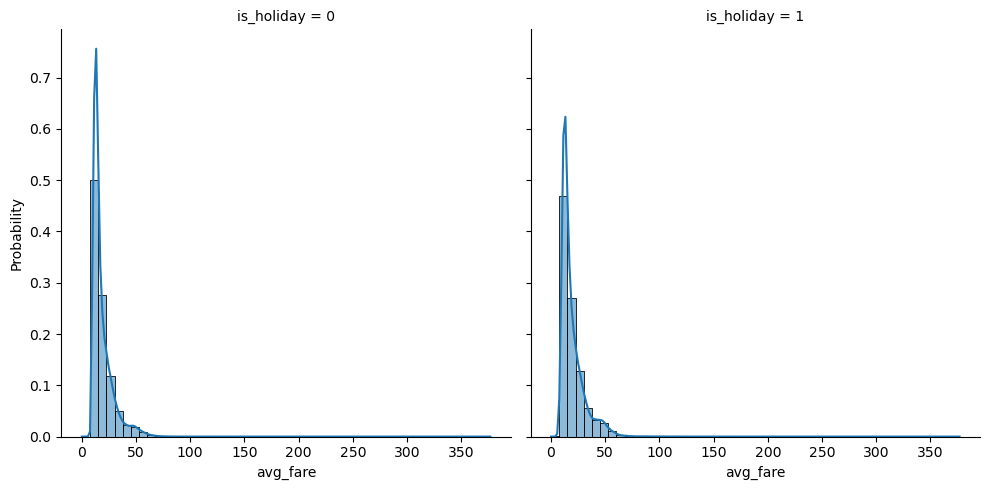

In [10]:
sns.displot(
    data=data_combined,
    x='avg_fare',
    weights='trip_ct',     # Use trip counts as weights
    col='is_holiday',      # Create separate plots for holiday vs non-holiday
    kde=True,              # Optional: adds KDE curve
    bins=50,               # Optional: set number of bins
    common_norm=False,      # Prevents normalization across facets
    stat='probability'
)

plt.show()

In [11]:
data_combined['log_fare'] = np.log(data_combined['avg_fare'])

c:\Users\mwendwa.kiko\Anaconda3\envs\cme538env2\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_19532\2643717068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined['log_fare'] = np.log(data_combined['avg_fare'])


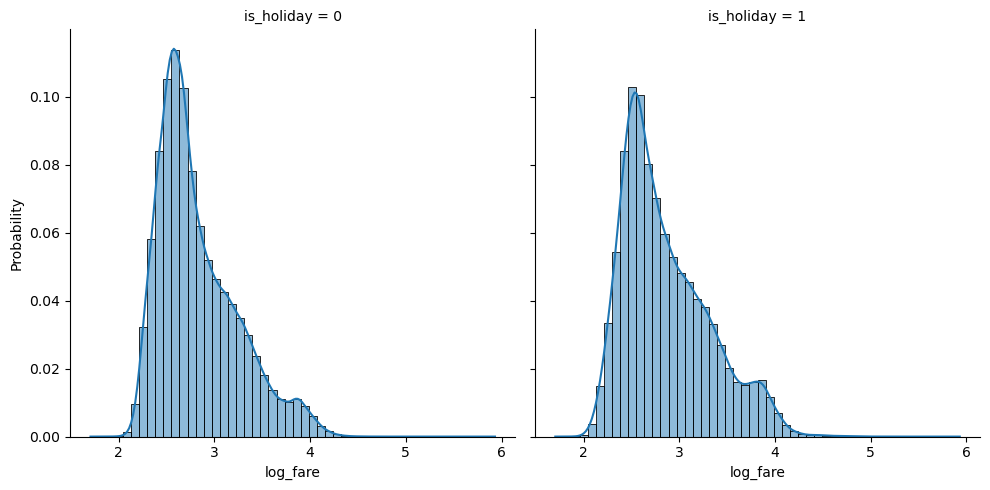

In [12]:
sns.displot(
    data=data_combined,
    x='log_fare',
    weights='trip_ct',     # Use trip counts as weights
    col='is_holiday',      # Create separate plots for holiday vs non-holiday
    kde=True,              # Optional: adds KDE curve
    bins=50,               # Optional: set number of bins
    common_norm=False,      # Prevents normalization across facets
    stat='probability'
)

plt.show()

Some cleaning steps, trying to get rid of data with nonsensical trip distances or NaN values

In [13]:
(data_combined['avg_trip_distance'] == 0).sum()

0

In [14]:
data_combined.loc[data_combined['avg_trip_distance'] == 0, 'trip_ct']

Series([], Name: trip_ct, dtype: int64)

In [15]:
(data_combined['avg_trip_distance'].isna()).sum(), (data_combined['avg_fare'].isna()).sum()

(0, 0)

Remove rows with avg_trip_distance == 0 or NaN for either trip distance or trip fare

In [16]:
undesirable_rows = (
    (data_combined['avg_trip_distance'] == 0)|(data_combined['avg_trip_distance'].isna())|(data_combined['avg_fare'].isna())
    )
data_combined.shape
data_combined = data_combined.loc[~undesirable_rows]
data_combined.shape

(5411141, 15)

In [17]:
data_combined['fare_per_dist'] = data_combined['avg_fare'] / data_combined['avg_trip_distance']
data_combined['fare_per_dist'].describe()

count    5.411141e+06
mean     2.290644e+00
std      8.330580e-01
min      0.000000e+00
25%      1.726423e+00
50%      2.098361e+00
75%      2.646512e+00
max      3.898462e+02
Name: fare_per_dist, dtype: float64

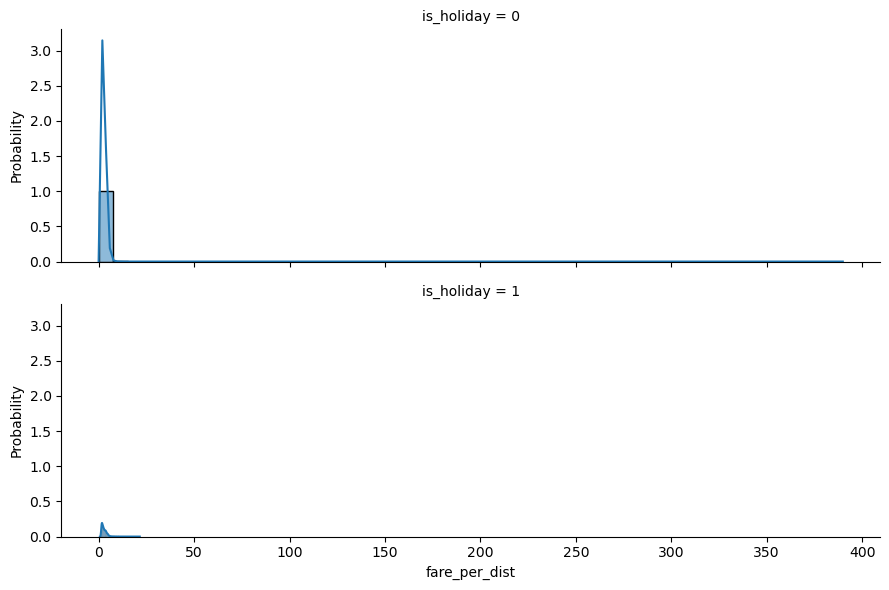

In [18]:
g = sns.FacetGrid(data_combined, row="is_holiday", height=3, aspect=3, sharex=True)
g.map(sns.histplot, "fare_per_dist", bins=50, stat="probability", kde=True, weights=data_combined['trip_ct'])

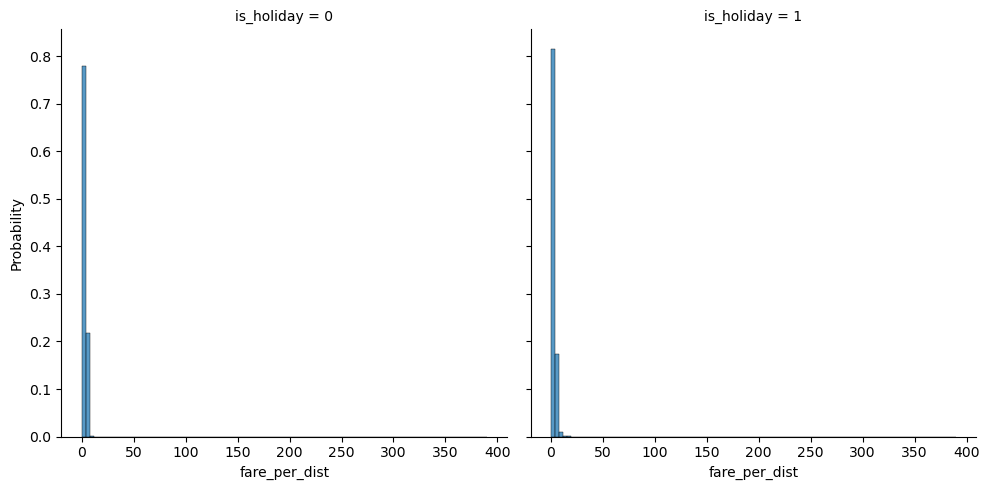

In [19]:
sns.displot(
    data=data_combined,
    x='fare_per_dist',
    weights='trip_ct',     # Use trip counts as weights
    col='is_holiday',      # Create separate plots for holiday vs non-holiday
    kde=False,              # Optional: adds KDE curve
    bins=100,               # Optional: set number of bins
    common_norm=False,      # Prevents normalization across facets
    stat='probability'
)

plt.show()

In [20]:
data_combined['log_fare_per_dist'] = np.log(data_combined['fare_per_dist'] + 0.001)

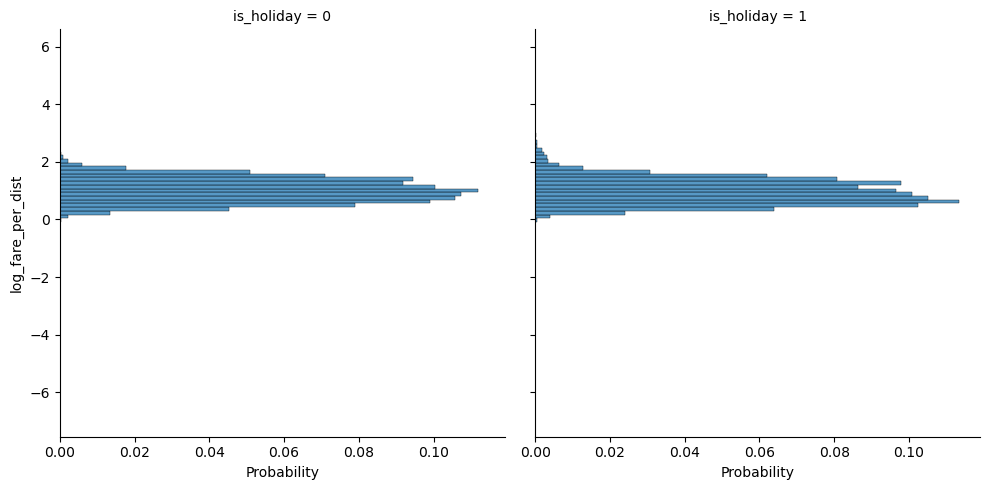

In [21]:
sns.displot(
    data=data_combined,
    y='log_fare_per_dist',
    weights='trip_ct',     # Use trip counts as weights
    col='is_holiday',      # Create separate plots for holiday vs non-holiday
    kde=False,              # Optional: adds KDE curve
    bins=100,               # Optional: set number of bins
    common_norm=False,      # Prevents normalization across facets
    stat='probability'
)

plt.show()

Weekday analysis

In [22]:
data_combined['ds'] = pd.to_datetime(data_combined['ds'])
data_combined['is_weekday'] = data_combined['ds'].dt.weekday < 5

In [23]:
data_combined['day_type'] = np.where(data_combined['is_holiday'] ==  1, 'holiday',
            np.where(data_combined['is_weekday'] == 0, 'weekend', 'workday'))

<Figure size 2000x1000 with 0 Axes>

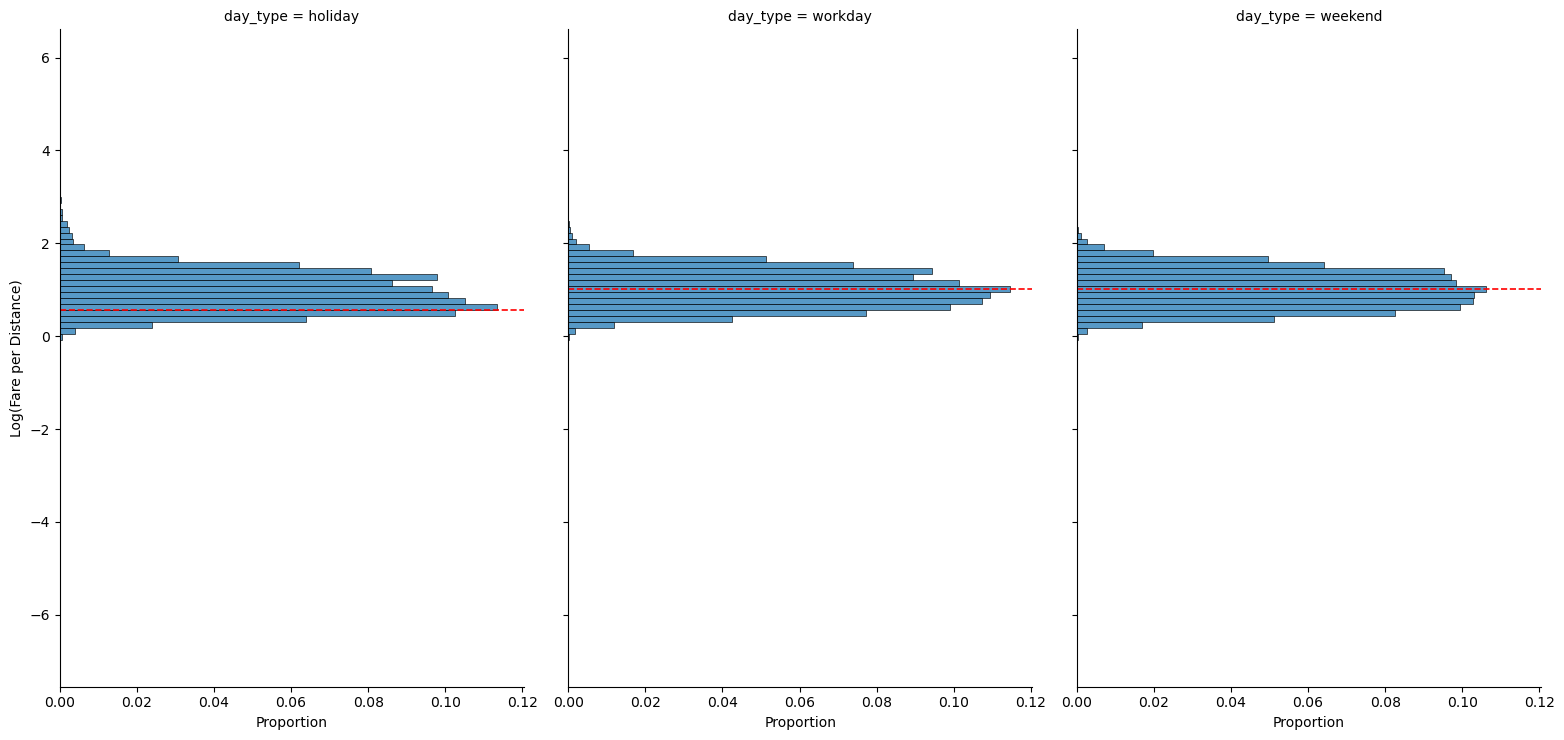

In [24]:
plt.figure(figsize=(20, 10))
g = sns.displot(
    data=data_combined,
    y='log_fare_per_dist',
    weights='trip_ct',       # weight by trip count
    col='day_type',        # separate plots for holiday / non-holiday
    kde=False,
    bins=100,
    common_norm=False,
    stat='probability',
    height=7.5,
    aspect=0.7
)

# Function to compute and plot horizontal modal line per facet
def add_modal_line(data, color, **kwargs):
    counts, bin_edges = np.histogram(
        data['log_fare_per_dist'],
        bins=kwargs.get('bins', 100),
        weights=data['trip_ct'],
        density=False
    )
    mode_idx = np.argmax(counts)
    mode_value = (bin_edges[mode_idx] + bin_edges[mode_idx + 1]) / 2
    plt.axhline(mode_value, color='red', linestyle='--', linewidth=1.2)

# Add the line to each facet
g.map_dataframe(add_modal_line, bins=100)

# Label axes
g.set_axis_labels("Proportion", "Log(Fare per Distance)")
# plt.tight_layout()
plt.show()

In [25]:
data_combined['fare_per_dist_capped'] = np.where(
    data_combined['fare_per_dist'] < np.quantile(data_combined['fare_per_dist'], 0.999),
    data_combined['fare_per_dist'],
    np.quantile(data_combined['fare_per_dist'], 0.999)
)
data_combined['fare_per_dist_capped'].describe()

count    5.411141e+06
mean     2.289004e+00
std      7.877603e-01
min      0.000000e+00
25%      1.726423e+00
50%      2.098361e+00
75%      2.646512e+00
max      6.524442e+00
Name: fare_per_dist_capped, dtype: float64

<Figure size 2000x1000 with 0 Axes>

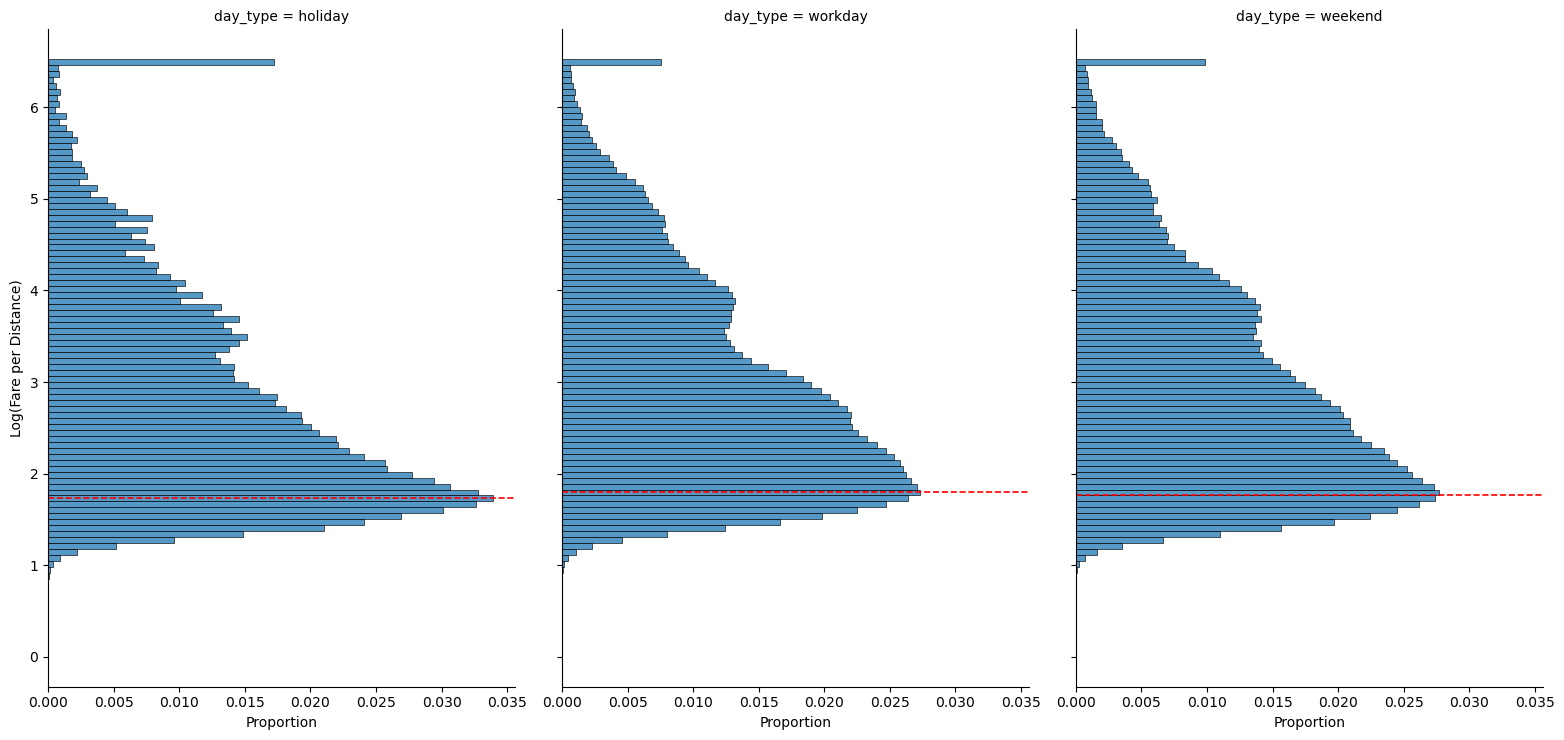

In [26]:
plt.figure(figsize=(20, 10))
g = sns.displot(
    data=data_combined,
    y='fare_per_dist_capped',
    weights='trip_ct',       # weight by trip count
    col='day_type',        # separate plots for holiday / non-holiday
    kde=False,
    bins=100,
    common_norm=False,
    stat='probability',
    height=7.5,
    aspect=0.7
)

# Function to compute and plot horizontal modal line per facet
def add_modal_line(data, color, **kwargs):
    counts, bin_edges = np.histogram(
        data['fare_per_dist_capped'],
        bins=kwargs.get('bins', 100),
        weights=data['trip_ct'],
        density=False
    )
    mode_idx = np.argmax(counts)
    mode_value = (bin_edges[mode_idx] + bin_edges[mode_idx + 1]) / 2
    plt.axhline(mode_value, color='red', linestyle='--', linewidth=1.2)

# Add the line to each facet
g.map_dataframe(add_modal_line, bins=100)

# Label axes
g.set_axis_labels("Proportion", "Log(Fare per Distance)")
# plt.tight_layout()
plt.show()

Adding the variables we wanna use for AutoML

In [27]:
origin_demand = (
    data_combined
    .groupby(["pickup_hr", "pickup_municipality"], as_index=False)
    .agg(origin_demand=("trip_ct", "sum"))
)
origin_demand

,pickup_hr,pickup_municipality,origin_demand
0,2023-01-01 00:00:00-05,Pearson Airport,121
1,2023-01-01 00:00:00-05,Toronto,10418
2,2023-01-01 01:00:00-05,Pearson Airport,34
3,2023-01-01 01:00:00-05,Toronto,12299
4,2023-01-01 02:00:00-05,Pearson Airport,29
...,...,...,...
46708,2025-08-31 21:00:00-04,Toronto,10105
46709,2025-08-31 22:00:00-04,Pearson Airport,271
46710,2025-08-31 22:00:00-04,Toronto,10263
46711,2025-08-31 23:00:00-04,Pearson Airport,236


In [28]:
data_combined = data_combined.merge(origin_demand, on=["pickup_hr", "pickup_municipality"])
data_combined

,index,ds,pickup_hr,pickup_municipality,pickup_community_council,pickup_ward,dropoff_municipality,dropoff_community_council,dropoff_ward,trip_ct,...,avg_trip_distance,avg_waittime,is_holiday,log_fare,fare_per_dist,log_fare_per_dist,is_weekday,day_type,fare_per_dist_capped,origin_demand
0,3,2023-01-01,2023-01-01 02:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,402,...,5.85,8.17,1,3.814631,7.753846,2.048318,False,holiday,6.524442,12952
1,4,2023-01-01,2023-01-01 03:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,462,...,6.17,8.82,1,3.587400,5.857374,1.767872,False,holiday,5.857374,12791
2,5,2023-01-01,2023-01-01 13:00:00-05,Toronto,Toronto and East York,Not included elsewhere,Pearson Airport,Not in Toronto,Not in Toronto,28,...,27.84,6.93,1,4.033355,2.027658,0.707375,False,holiday,2.027658,3648
3,6,2023-01-01,2023-01-01 17:00:00-05,Toronto,North York,Not included elsewhere,Toronto,North York,Not included elsewhere,7,...,12.96,5.14,1,3.170106,1.837191,0.608782,False,holiday,1.837191,4338
4,7,2023-01-01,2023-01-01 11:00:00-05,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,Not included elsewhere,5,...,25.50,4.00,1,3.921775,1.980000,0.683602,False,holiday,1.980000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411136,2121434,2025-03-20,2025-03-20 00:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,11,...,22.50,11.64,0,3.572907,1.583111,0.460023,True,workday,1.583111,264
5411137,2121471,2025-03-20,2025-03-20 20:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,16,...,23.90,6.25,0,3.687128,1.670711,0.513848,True,workday,1.670711,254
5411138,2121477,2025-03-20,2025-03-20 22:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,13,...,22.95,8.31,0,3.687378,1.740305,0.554635,True,workday,1.740305,319
5411139,2121483,2025-03-20,2025-03-20 21:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,Toronto and East York,19 - Beaches-East York,10,...,36.36,8.30,0,3.999851,1.501375,0.407047,True,workday,1.501375,305


In [29]:
dest_demand = (
    data_combined
    .groupby(["pickup_hr", "dropoff_municipality"], as_index=False)
    .agg(dest_demand=("trip_ct", "sum"))
)
dest_demand

,pickup_hr,dropoff_municipality,dest_demand
0,2023-01-01 00:00:00-05,Pearson Airport,4
1,2023-01-01 00:00:00-05,Toronto,10535
2,2023-01-01 01:00:00-05,Pearson Airport,11
3,2023-01-01 01:00:00-05,Toronto,12322
4,2023-01-01 02:00:00-05,Pearson Airport,36
...,...,...,...
46741,2025-08-31 21:00:00-04,Toronto,10318
46742,2025-08-31 22:00:00-04,Pearson Airport,42
46743,2025-08-31 22:00:00-04,Toronto,10492
46744,2025-08-31 23:00:00-04,Pearson Airport,19


In [30]:
data_combined = data_combined.merge(dest_demand, on=["pickup_hr", "dropoff_municipality"])
data_combined

,index,ds,pickup_hr,pickup_municipality,pickup_community_council,pickup_ward,dropoff_municipality,dropoff_community_council,dropoff_ward,trip_ct,...,avg_waittime,is_holiday,log_fare,fare_per_dist,log_fare_per_dist,is_weekday,day_type,fare_per_dist_capped,origin_demand,dest_demand
0,3,2023-01-01,2023-01-01 02:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,402,...,8.17,1,3.814631,7.753846,2.048318,False,holiday,6.524442,12952,12945
1,4,2023-01-01,2023-01-01 03:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,462,...,8.82,1,3.587400,5.857374,1.767872,False,holiday,5.857374,12791,12682
2,5,2023-01-01,2023-01-01 13:00:00-05,Toronto,Toronto and East York,Not included elsewhere,Pearson Airport,Not in Toronto,Not in Toronto,28,...,6.93,1,4.033355,2.027658,0.707375,False,holiday,2.027658,3648,136
3,6,2023-01-01,2023-01-01 17:00:00-05,Toronto,North York,Not included elsewhere,Toronto,North York,Not included elsewhere,7,...,5.14,1,3.170106,1.837191,0.608782,False,holiday,1.837191,4338,4385
4,7,2023-01-01,2023-01-01 11:00:00-05,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,Not included elsewhere,5,...,4.00,1,3.921775,1.980000,0.683602,False,holiday,1.980000,55,3262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411136,2121434,2025-03-20,2025-03-20 00:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,11,...,11.64,0,3.572907,1.583111,0.460023,True,workday,1.583111,264,3763
5411137,2121471,2025-03-20,2025-03-20 20:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,16,...,6.25,0,3.687128,1.670711,0.513848,True,workday,1.670711,254,10969
5411138,2121477,2025-03-20,2025-03-20 22:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,13,...,8.31,0,3.687378,1.740305,0.554635,True,workday,1.740305,319,9457
5411139,2121483,2025-03-20,2025-03-20 21:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,Toronto and East York,19 - Beaches-East York,10,...,8.30,0,3.999851,1.501375,0.407047,True,workday,1.501375,305,10496


Datetime based variables

In [32]:
# 1) Clean strings (common culprit: spaces, weird chars)
data_combined['pickup_hr'] = data_combined['pickup_hr'].astype(str).str.strip()

# 2) Parse to datetime; coerce bad rows to NaT (won’t break .dt)
data_combined['pickup_hr_dt'] = pd.to_datetime(
    data_combined['pickup_hr'], errors='coerce', utc=True
)

# 3) Optional: if your timestamps are epoch seconds or ms, use unit=...
# data_combined['pickup_hr_dt'] = pd.to_datetime(data_combined['pickup_hr'], unit='s', errors='coerce')

# 4) Now .dt works
data_combined['year_trip']   = data_combined['pickup_hr_dt'].dt.year
data_combined['day_of_week'] = data_combined['pickup_hr_dt'].dt.dayofweek
data_combined['hour_of_day'] = data_combined['pickup_hr_dt'].dt.hour
data_combined['month'] = data_combined['pickup_hr_dt'].dt.month

In [33]:
data_combined['pickup_hr_dt'].describe()

count                                5411141
mean     2024-05-24 19:47:02.426915328+00:00
min                2023-01-01 05:00:00+00:00
25%                2023-09-29 06:00:00+00:00
50%                2024-06-04 18:00:00+00:00
75%                2025-01-23 02:00:00+00:00
max                2025-09-01 03:00:00+00:00
Name: pickup_hr_dt, dtype: object

Considering Pearson Airport

In [34]:
data_combined['is_airport_origin'] = np.where(
    data_combined['pickup_municipality'] == "Pearson Airport", 1, 0)
data_combined['is_airport_destination'] = np.where(
    data_combined['dropoff_municipality'] == "Pearson Airport", 1, 0)

Dummies for origin ward and destination ward

In [35]:
data_combined['origin_ward_modified'] = np.where(
    data_combined['pickup_municipality'] == "Pearson Airport", 
    "Pearson", 
    data_combined["pickup_ward"]
)

data_combined['dest_ward_modified'] = np.where(
    data_combined['dropoff_municipality'] == "Pearson Airport", 
    "Pearson", 
    data_combined["dropoff_ward"]
)

In [37]:
data_combined_with_dummies = data_combined.copy()
data_combined_with_dummies = pd.concat([data_combined_with_dummies, pd.get_dummies(data_combined_with_dummies['origin_ward_modified'].str.strip(), prefix='origin_ward').astype(int)], axis=1)
data_combined_with_dummies = pd.concat([data_combined_with_dummies, pd.get_dummies(data_combined_with_dummies['dest_ward_modified'].str.strip(), prefix='dest_ward').astype(int)], axis=1)

In [38]:
data_combined_with_dummies

,index,ds,pickup_hr,pickup_municipality,pickup_community_council,pickup_ward,dropoff_municipality,dropoff_community_council,dropoff_ward,trip_ct,...,dest_ward_18 - Willowdale,dest_ward_19 - Beaches-East York,dest_ward_20 - Scarborough Southwest,dest_ward_21 - Scarborough Centre,dest_ward_22 - Scarborough-Agincourt,dest_ward_23 - Scarborough North,dest_ward_24 - Scarborough-Guildwood,dest_ward_25 - Scarborough-Rouge Park,dest_ward_Not included elsewhere,dest_ward_Pearson
0,3,2023-01-01,2023-01-01 02:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,402,...,0,0,0,0,0,0,0,0,1,0
1,4,2023-01-01,2023-01-01 03:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,462,...,0,0,0,0,0,0,0,0,1,0
2,5,2023-01-01,2023-01-01 13:00:00-05,Toronto,Toronto and East York,Not included elsewhere,Pearson Airport,Not in Toronto,Not in Toronto,28,...,0,0,0,0,0,0,0,0,0,1
3,6,2023-01-01,2023-01-01 17:00:00-05,Toronto,North York,Not included elsewhere,Toronto,North York,Not included elsewhere,7,...,0,0,0,0,0,0,0,0,1,0
4,7,2023-01-01,2023-01-01 11:00:00-05,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,Not included elsewhere,5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411136,2121434,2025-03-20,2025-03-20 00:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,11,...,1,0,0,0,0,0,0,0,0,0
5411137,2121471,2025-03-20,2025-03-20 20:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,16,...,1,0,0,0,0,0,0,0,0,0
5411138,2121477,2025-03-20,2025-03-20 22:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,13,...,1,0,0,0,0,0,0,0,0,0
5411139,2121483,2025-03-20,2025-03-20 21:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,Toronto and East York,19 - Beaches-East York,10,...,0,1,0,0,0,0,0,0,0,0


Merging with weather data

In [42]:
data_combined_with_dummies.columns

Index(['index', 'ds', 'pickup_hr', 'pickup_municipality',
       'pickup_community_council', 'pickup_ward', 'dropoff_municipality',
       'dropoff_community_council', 'dropoff_ward', 'trip_ct', 'avg_fare',
       'avg_trip_distance', 'avg_waittime', 'is_holiday', 'log_fare',
       'fare_per_dist', 'log_fare_per_dist', 'is_weekday', 'day_type',
       'fare_per_dist_capped', 'origin_demand', 'dest_demand', 'pickup_hr_dt',
       'year_trip', 'day_of_week', 'hour_of_day', 'month', 'is_airport_origin',
       'is_airport_destination', 'origin_ward_modified', 'dest_ward_modified',
       'origin_ward_01 - Etobicoke North', 'origin_ward_02 - Etobicoke Centre',
       'origin_ward_03 - Etobicoke-Lakeshore',
       'origin_ward_04 - Parkdale-High Park',
       'origin_ward_05 - York South-Weston', 'origin_ward_06 - York Centre',
       'origin_ward_07 - Humber River-Black Creek',
       'origin_ward_08 - Eglinton-Lawrence', 'origin_ward_09 - Davenport',
       'origin_ward_10 - Spadina-Fort

In [43]:
data_combined_with_dummies['ds']

0         2023-01-01
1         2023-01-01
2         2023-01-01
3         2023-01-01
4         2023-01-01
             ...    
5411136   2025-03-20
5411137   2025-03-20
5411138   2025-03-20
5411139   2025-03-20
5411140   2025-03-20
Name: ds, Length: 5411141, dtype: datetime64[ns]

In [58]:
weather_data['ds'] = weather_data['year'].astype(str) + '-' + weather_data['month'].astype(str).str.zfill(2) + '-' + weather_data['day'].astype(str).str.zfill(2) + ' ' + weather_data['hour.1'].astype(str).str.zfill(2) + ':00:00'
weather_data['ds'] = pd.to_datetime(weather_data['ds'])
# timezone conversion if needed
weather_data['ds'] = weather_data['ds'].dt.tz_localize('UTC')
data_combined_with_dummies_weather = data_combined_with_dummies.merge(weather_data, left_on='pickup_hr_dt', right_on='ds', how='left').drop(columns=['ds_y'])
data_combined_with_dummies_weather['precip_amount_mm'].fillna(0, inplace=True)
data_combined_with_dummies_weather

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_19532\3286966620.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_combined_with_dummies_weather['precip_amount_mm'].fillna(0, inplace=True)


,index,ds_x,pickup_hr,pickup_municipality,pickup_community_council,pickup_ward,dropoff_municipality,dropoff_community_council,dropoff_ward,trip_ct,...,dest_ward_24 - Scarborough-Guildwood,dest_ward_25 - Scarborough-Rouge Park,dest_ward_Not included elsewhere,dest_ward_Pearson,hour,day,month_y,year,hour.1,precip_amount_mm
0,3,2023-01-01,2023-01-01 02:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,402,...,0,0,1,0,7.0,1.0,1.0,2023.0,7.0,0.0
1,4,2023-01-01,2023-01-01 03:00:00-05,Toronto,Toronto and East York,04 - Parkdale-High Park,Toronto,Toronto and East York,Not included elsewhere,462,...,0,0,1,0,8.0,1.0,1.0,2023.0,8.0,0.0
2,5,2023-01-01,2023-01-01 13:00:00-05,Toronto,Toronto and East York,Not included elsewhere,Pearson Airport,Not in Toronto,Not in Toronto,28,...,0,0,0,1,18.0,1.0,1.0,2023.0,18.0,0.0
3,6,2023-01-01,2023-01-01 17:00:00-05,Toronto,North York,Not included elsewhere,Toronto,North York,Not included elsewhere,7,...,0,0,1,0,22.0,1.0,1.0,2023.0,22.0,0.0
4,7,2023-01-01,2023-01-01 11:00:00-05,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,Not included elsewhere,5,...,0,0,1,0,16.0,1.0,1.0,2023.0,16.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411136,2121434,2025-03-20,2025-03-20 00:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,11,...,0,0,0,0,4.0,20.0,3.0,2025.0,4.0,0.0
5411137,2121471,2025-03-20,2025-03-20 20:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,16,...,0,0,0,0,0.0,21.0,3.0,2025.0,0.0,0.0
5411138,2121477,2025-03-20,2025-03-20 22:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,North York,18 - Willowdale,13,...,0,0,0,0,2.0,21.0,3.0,2025.0,2.0,0.0
5411139,2121483,2025-03-20,2025-03-20 21:00:00-04,Pearson Airport,Not in Toronto,Not in Toronto,Toronto,Toronto and East York,19 - Beaches-East York,10,...,0,0,0,0,1.0,21.0,3.0,2025.0,1.0,0.0


In [59]:
# Break it into two equal parts (first half and second half of the dataset)
midpoint = len(data_combined_with_dummies_weather) // 2
first_half = data_combined_with_dummies_weather.iloc[:midpoint]
second_half = data_combined_with_dummies_weather.iloc[midpoint:]

# Save each as csv
first_half.to_csv(r'.\data_combined_with_dummies_weather_first_half.csv', index=False)
second_half.to_csv(r'.\data_combined_with_dummies_weather_second_half.csv', index=False)

In [60]:
# Save csv
data_combined_with_dummies_weather.to_csv(r'.\data_combined_with_dummies_weather.csv', index=False)



In [52]:
# Save parquet
data_combined_with_dummies_weather.to_parquet(r'.\data_combined_with_dummies_weather.parquet', index=False)

ArrowKeyError: No type extension with name arrow.py_extension_type found

Plotting to check coherence

(<Axes: xlabel='day_of_week'>,)

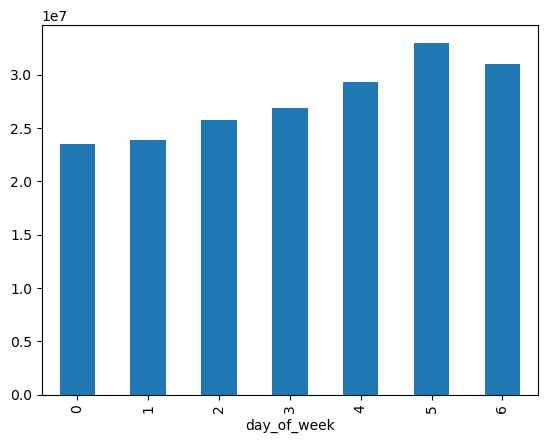

In [ ]:

data_combined.groupby(['day_of_week'])['trip_ct'].sum().sort_index().plot(kind='bar'),



(<Axes: xlabel='year_trip'>,)

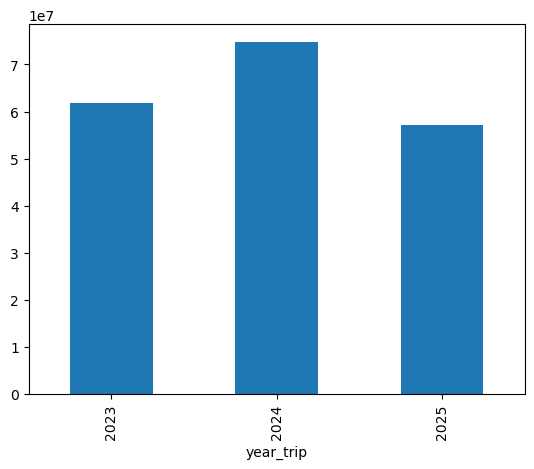

In [ ]:
data_combined.groupby(['year_trip'])['trip_ct'].sum().sort_index().plot(kind='bar'),


(<Axes: xlabel='hour_of_day'>,)

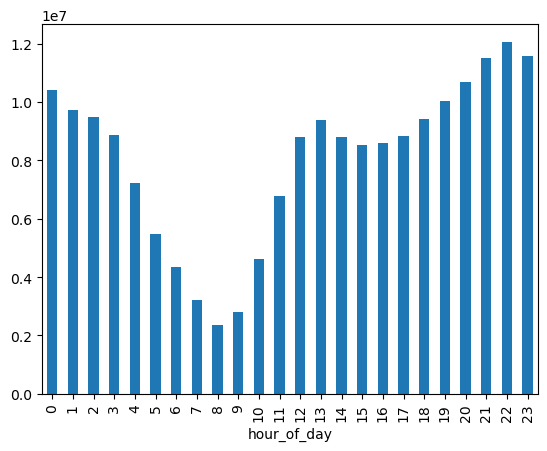

In [ ]:
data_combined.groupby(['hour_of_day'])['trip_ct'].sum().sort_index().plot(kind='bar'),


(<Axes: xlabel='month'>,)

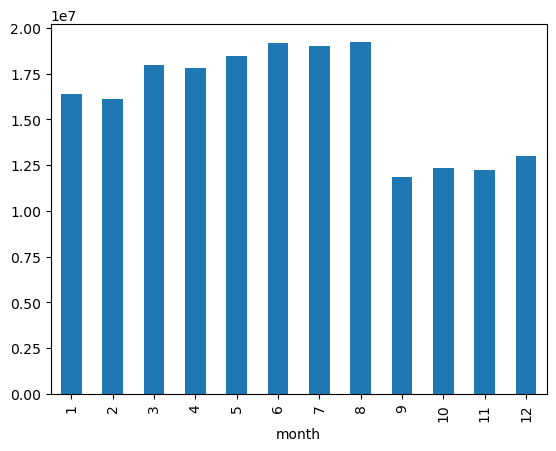

In [ ]:
data_combined.groupby(['month'])['trip_ct'].sum().sort_index().plot(kind='bar'),


In [ ]:
data_combined['avg_trip_distance'].describe()

count    7.868187e+06
mean     1.772312e+01
std      1.518453e+01
min      1.000000e-01
25%      6.890000e+00
50%      1.274000e+01
75%      2.427000e+01
max      9.282400e+03
Name: avg_trip_distance, dtype: float64